## เตรียมข้อมูลก่อนนำไปวิเคราะห์

### แบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอ เมืองลำพูน จังหวัด ลำพูน

#### เปิดไฟล์และทำความสะอาดข้อมูล

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [32]:
# เปิดไฟล์ csv
df_64 = pd.read_csv("dataset/2564.csv")

# ลบลูกน้ำออก
df_64 = df_64.replace(',','', regex=True)

# เติมค่าว่างตั้งแต่หลักที่ 8 ให้เป็น 0
df_64.iloc[:, 8:] = df_64.iloc[:, 8:].fillna("0")  

# เติมค่าว่างให้เป็น -
df_64 = df_64.fillna("-")  

# แปลงประเภทของข้อมูลให้เป็นตัวเลข
df_64.iloc[:, 8:] = df_64.iloc[:, 8:].astype(float) 

C:\Users\NotOte\AppData\Local\Temp\ipykernel_26488\3986755587.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       38.7
1       75.5
2       75.5
3       75.5
4       20.7
        ... 
6501    35.5
6502    48.0
6503     0.0
6504    81.4
6505    70.4
Name: tarang_wa, Length: 6506, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_64.iloc[:, 8:] = df_64.iloc[:, 8:].fillna("0")


In [33]:
# แสดงข้อมูล
df_64

,order,type,document_number,pracel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc
0,1,โฉนด,1181,1384,1441.0,01A002,1.0,0.0,38.7,0.0,438.7,0.0,0.0,0.0
1,2,โฉนด,1755,1386,1439.0,01A003,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
2,3,โฉนด,85625,37,4752.0,01A003/001,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
3,4,โฉนด,85626,38,4753.0,01A003/002,0.0,0.0,75.5,0.0,75.5,0.0,0.0,0.0
4,5,โฉนด,1402,1385,1440.0,01A004,0.0,1.0,20.7,0.0,0.0,0.0,0.0,120.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,6585,โฉนด,29141,2286,3562.0,06L022,0.0,3.0,35.5,0.0,335.5,0.0,0.0,0.0
6502,6586,โฉนด,29140,2478,3563.0,06L023,0.0,3.0,48.0,0.0,348.0,0.0,0.0,0.0
6503,6587,โฉนด,98537,219,4945.0,06L023/001,0.0,2.0,0.0,0.0,0.0,0.0,0.0,200.0
6504,6588,โฉนด,29139,2476,3574.0,06L024,0.0,3.0,81.4,0.0,0.0,0.0,381.4,0.0


#### จำแนกลักษณะการทำประโยชน์

In [34]:
# สร้างคอลัมม์ใหม่
df_64["type_of_usage"] = pd.Series([float('NaN')] * len(df_64))

In [35]:
# จำแนกลักษณ์การทำประโยชน์จากพื้นที่ใช้งาน ('พื้นที่ประกอบเกษตรกรรม', 'พื้นที่อยู่อาศัย', 'พื้นที่อื่น ๆ', 'พื้นที่ว่างเปล่า', 'พื้นที่ใช้ประโยชน์หลายประเภท' และ 'ไม่ทราบลักษณะการใช้')
df_64[df_64["usage_agriculture"] > 0] = df_64[df_64["usage_agriculture"] > 0].fillna("agriculture")
df_64[df_64["usage_living"] > 0] = df_64[df_64["usage_living"] > 0].fillna("living")
df_64[df_64["usage_other"] > 0] = df_64[df_64["usage_other"] > 0].fillna("other")
df_64[df_64["usage_none"] > 0] = df_64[df_64["usage_none"] > 0].fillna("wasteland")
df_64[df_64["usage_misc"] > 0] = df_64[df_64["usage_misc"] > 0].fillna("misc")        
df_64["type_of_usage"] = df_64["type_of_usage"].fillna("unknown")

C:\Users\NotOte\AppData\Local\Temp\ipykernel_26488\614487288.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_64[df_64["usage_agriculture"] > 0] = df_64[df_64["usage_agriculture"] > 0].fillna("agriculture")
C:\Users\NotOte\AppData\Local\Temp\ipykernel_26488\614487288.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' 'agriculture' 'agriculture' 'agriculture' 'agriculture'
 'agriculture' '

In [36]:
# แสดงข้อมูลโดยจำแนกออกมาแค่ รหัสแปลงที่ดิน และ ลักษณะการใช้ประโยชน์
# พื้นที่ประกอบเกษตรกรรม : agriculture, พื้นที่อยู่อาศัย : living, พื้นที่อื่น ๆ : other, 
# พื้นที่ว่างเปล่า : wasteland, พื้นที่ใช้ประโยชน์หลายประเภท : misc และ ไม่ทราบลักษณะการใช้ : unknown

df_64[ ['location_id', 'type_of_usage'] ]

,location_id,type_of_usage
0,01A002,living
1,01A003,living
2,01A003/001,living
3,01A003/002,living
4,01A004,misc
...,...,...
6501,06L022,living
6502,06L023,living
6503,06L023/001,misc
6504,06L024,wasteland


## วิเคราะห์ข้อมูลและรายงานผล

#### จากแบบบัญชีรายการที่ดิน เทศบาลเมืองลำพูน อำเภอเมือง จังหวัดลำพูน ในปี 2564 มีที่ดิน 6506 ที่

In [37]:
land = len(df_64) 
land

6506

### ที่ดินสามารถจำแนกจากลักษณะการทำประโยชน์ 6 รายการ ได้แก่ ประกอบการเกษตร, ใช้เพื่ออยู่อาศัย, อื่น ๆ , ไม่ใช้ประโยชน์, ใช้ประโยชน์หลายประเภท และ ไม่ทราบลักษณะการใช้

#### มีพื้นที่ประกอบเกษตรกรรม 392 พื้นที่ คิดเป็น 6.0252 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [38]:
len(df_64[df_64["type_of_usage"] == "agriculture"])

392

In [39]:
(len(df_64[df_64["type_of_usage"] == "agriculture"]) / land) * 100  

6.025207500768522

#### มีพื้นที่อยู่อาศัย 3596 พื้นที่ คิดเป็น 55.2720 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน 

In [40]:
len(df_64[df_64["type_of_usage"] == "living"]) 

3596

In [41]:
len(df_64[df_64["type_of_usage"] == "living"]) / land * 100

55.272056563172455

#### มีพื้นที่อื่น ๆ 1176 พื้นที่ คิดเป็น 18.0756 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [42]:
len(df_64[df_64["type_of_usage"] == "other"])

1176

In [43]:
len(df_64[df_64["type_of_usage"] == "other"]) / land * 100

18.075622502305563

#### มีพื้นที่ว่างเปล่า/ไม่ทำประโยชน์ 706 พื้นที่ คิดเป็น 10.8515 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [44]:
len(df_64[df_64["type_of_usage"] == "wasteland"])

706

In [45]:
len(df_64[df_64["type_of_usage"] == "wasteland"]) / land * 100

10.851521672302491

#### และมีพื้นที่ใช้ประโยชน์หลายประเภท 492 พื้นที่ คิดเป็น 7.5623 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [46]:
len(df_64[df_64["type_of_usage"] == "misc"])

492

In [47]:
len(df_64[df_64["type_of_usage"] == "misc"]) / land * 100

7.562250230556409

#### และมีพื้นที่ไม่ทราบลักษณะการใช้ 144 พื้นที่ คิดเป็น 2.2133 เปอร์เซ็นของพื้นที่ทั้งหมดในอำเภอเมือง จังหวัดลำพูน

In [48]:
len(df_64[df_64["type_of_usage"] == "unknown"])

144

In [49]:
len(df_64[df_64["type_of_usage"] == "unknown"]) / land * 100

2.2133415308945588

#### จากข้อมูลข้างต้น สามารถนำมาแสดงเป็นแผนภาพได้ดังนี้

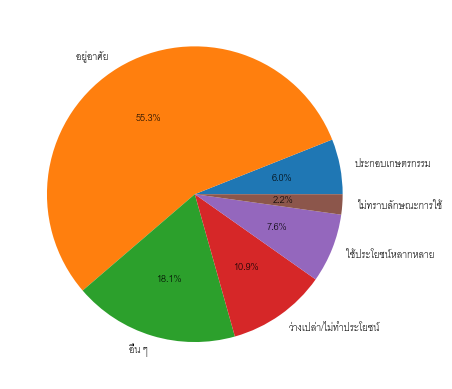

In [50]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Cordia New"
plt.rcParams["font.serif"] = "Cordia New"

# สร้างกราฟ
data = [ len(df_64[df_64["type_of_usage"] == "agriculture"]),
         len(df_64[df_64["type_of_usage"] == "living"]), 
         len(df_64[df_64["type_of_usage"] == "other"]), 
         len(df_64[df_64["type_of_usage"] == "wasteland"]), 
         len(df_64[df_64["type_of_usage"] == "misc"]),
         len(df_64[df_64["type_of_usage"] == "unknown"])
       ]
labels = ['ประกอบเกษตรกรรม','อยู่อาศัย ','อื่น ๆ','ว่างเปล่า/ไม่ทำประโยชน์','ใช้ประโยชน์หลากหลาย', 'ไม่ทราบลักษณะการใช้'] 

plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.show()

##  ข้อมูลเฉพาะลักษณะการใช้ประโยชน์แบบประกอบเกษตรกรรม

#### ดูข้อมูลทั้งหมด

In [51]:
df_64["type"] = df_64["type"].replace("-", "ไม่ระบุ")
agricultrue_land = df_64[df_64["type_of_usage"] == "agriculture"]
agricultrue_land

,order,type,document_number,pracel_number,sub_district_no,location_id,rai,ngan,tarang_wa,usage_agriculture,usage_living,usage_other,usage_none,usage_misc,type_of_usage
5,6,โฉนด,1758,1389,1438.0,01A005,2.0,1.0,8.7,908.7,0.0,0.0,0.0,0.0,agriculture
49,50,โฉนด,1372,1433,5392.0,01A033,0.0,0.0,84.8,84.8,0.0,0.0,0.0,0.0,agriculture
70,71,โฉนด,72196,1411,-,01A044/002,0.0,0.0,84.1,84.1,0.0,0.0,0.0,0.0,agriculture
95,96,โฉนด,112915,26,5057.0,01B010/002,0.0,0.0,6.1,6.1,0.0,0.0,0.0,0.0,agriculture
121,122,โฉนด,2313,292,1397.0,01B033,0.0,0.0,67.1,67.1,0.0,0.0,0.0,0.0,agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6398,6482,โฉนด,130392,2762,5490.0,06K001/014,0.0,1.0,43.5,143.5,0.0,0.0,0.0,0.0,agriculture
6436,6520,โฉนด,134218,2117,5969.0,06K011/001,0.0,0.0,81.0,81.0,0.0,0.0,0.0,0.0,agriculture
6462,6546,โฉนด,24540,2281,3282.0,06K017,0.0,1.0,96.5,196.5,0.0,0.0,0.0,0.0,agriculture
6463,6547,โฉนด,24539,2280,3281.0,06K018,0.0,3.0,93.1,393.1,0.0,0.0,0.0,0.0,agriculture


#### จำนวนที่ดินที่ประกอบเกษตรกรรม

In [52]:
len(agricultrue_land) # 389 ที่

392

#### ดูข้อมูลทั้งหมดจำแนกแยกด้วยประเภท

In [53]:
df_64.groupby('type').size()

type
ที่ราชพัสดุ      13
น.ส.3            13
น.ส.ล.            6
โฉนด           6382
ไม่ระบุ          92
dtype: int64

In [54]:
agricultrue_land.groupby('type').size()

# โฉนด 392 ที่

type
โฉนด    392
dtype: int64

#### สามารถดาวน์โหลดไฟล์ csv โดยการนำ '#' ออกและกดรันโปรแกรม

In [55]:
# df_64.to_csv('target/data2564.csv', index=False)

In [56]:
df_64.iloc[:, 8:] = df_64.iloc[:, 8:].replace(0,'-')
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("agriculture", "ประกอบเกษตรกรรม")
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("living", "อยู่อาศัย")
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("other", "อื่น ๆ")
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("misc", "ใช้ประโยชน์หลากหลาย")
df_64.iloc[:, -1] = df_64.iloc[:, -1].replace("unknown", "ไม่ทราบลักษณะการใช้ ")

In [57]:
df_64 = df_64.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "pracel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "usage_living" : "อยู่อาศัย (ตร.ว.)",
                    "usage_other" : "อื่น ๆ (ตร.ว.)",
                    "usage_none" : "ว่างเปล่า/ไม่ทำประโยชน์ (ตร.ว.)",
                    "usage_misc" : "ใช้ประโยชน์หลากหลาย (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [58]:
df_64[df_64["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2564/พื้นที่ประกอบเกษตรกรรม2564.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [59]:
df_64[df_64["ลักษณะการทำประโยชน์"] == "ประกอบเกษตรกรรม"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2564/พื้นที่ประกอบเกษตรกรรม2564.xlsx', index=False)

#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [60]:
df_64[df_64["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_csv('../result/พื้นที่ประกอบเกษตรกรรม/2564/พื้นที่รกร้าง2564.csv', index=False)

#### สามารถดาวน์โหลดไฟล์ excel (เฉพาะพื้นที่รกร้าง) โดยการนำ '#' ออกและกดรันโปรแกรม

In [61]:
df_64[df_64["ลักษณะการทำประโยชน์"] == "ว่างเปล่า/ไม่ทำประโยชน์"].to_excel('../result/พื้นที่ประกอบเกษตรกรรม/2564/พื้นที่รกร้าง2564.xlsx', index=False)

---

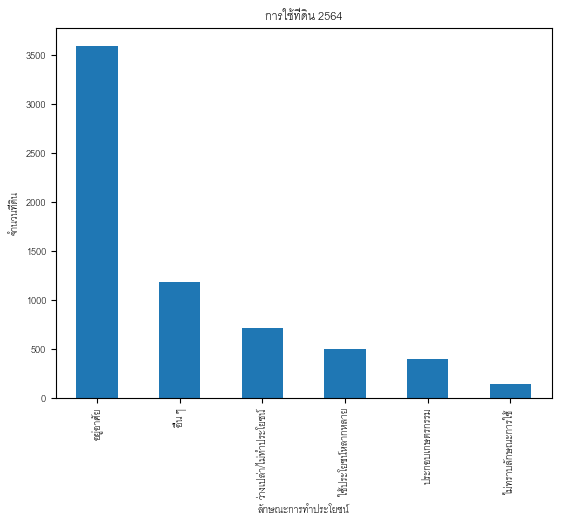

In [62]:
value_counts = df_64["ลักษณะการทำประโยชน์"].value_counts() 
value_counts.plot(kind="bar")
plt.title("การใช้ที่ดิน 2564")
plt.xlabel("ลักษณะการทำประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()